In [1]:
import numpy as np 
import pandas as pd 

import re
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
with open('text_input.txt', encoding='utf-8') as file:
    data = file.read()

In [3]:
soup=BeautifulSoup(data,'html.parser')#remove html tag using beautifulsoup
non_html_text=soup.get_text()
    
#remove unwanted charectors and symbols
text=re.sub('[^a-zA-Z0-9\s]',' ',non_html_text)
text = text.replace('\n', '').replace('\r', '').replace('\ufeff', '')

#remove extra spaces
z = []
for i in text.split():
    if i not in z:
        z.append(i)  
text = ' '.join(z)

#tokenize text
    
tokenizer=Tokenizer()
tokenizer.fit_on_texts([text])
sequence=tokenizer.texts_to_sequences([text])[0]

sequence[:15]

[27, 28, 29, 1, 30, 31, 32, 33, 2, 34, 35, 2, 3, 4, 5]

In [4]:
ip_dim=len(tokenizer.word_index)+1
ip_dim

695

In [5]:
#traning sequence

sequences = []

for i in range(3, len(sequence)):
    words = sequence[i-3:i+1]
    sequences.append(words)
    
print("The Length of sequences are: ", len(sequences))
sequences = np.array(sequences)


x,y=[],[]
for i in sequences:
    x.append(i[0:3])
    y.append(i[3])
x=np.array(x)
y=np.array(y)

The Length of sequences are:  717


In [6]:
x[:10],y[:10]

(array([[27, 28, 29],
        [28, 29,  1],
        [29,  1, 30],
        [ 1, 30, 31],
        [30, 31, 32],
        [31, 32, 33],
        [32, 33,  2],
        [33,  2, 34],
        [ 2, 34, 35],
        [34, 35,  2]]),
 array([ 1, 30, 31, 32, 33,  2, 34, 35,  2,  3]))

In [7]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# # # Pad "sequences" to a fixed length
# max_len = 10
# x = pad_sequences(x, maxlen=max_len)
# y = pad_sequences(y, maxlen=max_len)

# Convert y to categorical

y = to_categorical(y, num_classes=ip_dim)
y[:10]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Embedding
model=Sequential()
model.add(Embedding(ip_dim,10,input_length=3))
model.add(LSTM(1000,return_sequences=True))
model.add(LSTM(1000))
model.add(Dense(1000, activation="relu"))
model.add(Dense(ip_dim,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 10)             6950      
                                                                 
 lstm (LSTM)                 (None, 3, 1000)           4044000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 695)               695695    
                                                                 
Total params: 13,751,645
Trainable params: 13,751,645
Non-trainable params: 0
_________________________________________________________________


In [9]:
#text

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
history = model.fit(x,y,batch_size=62,epochs=50)

Epoch 1/50
12/12 [==============================] - 17s 394ms/step - loss: 6.5492 - accuracy: 0.0014
Epoch 2/50
12/12 [==============================] - 5s 392ms/step - loss: 6.5451 - accuracy: 0.0014
Epoch 3/50
12/12 [==============================] - 5s 392ms/step - loss: 6.5442 - accuracy: 0.0014
Epoch 4/50
12/12 [==============================] - 5s 396ms/step - loss: 6.5455 - accuracy: 0.0028
Epoch 5/50
12/12 [==============================] - 5s 387ms/step - loss: 6.5434 - accuracy: 0.0042
Epoch 6/50
12/12 [==============================] - 5s 384ms/step - loss: 6.5306 - accuracy: 0.0056
Epoch 7/50
12/12 [==============================] - 5s 386ms/step - loss: 6.3862 - accuracy: 0.0042
Epoch 8/50
12/12 [==============================] - 5s 403ms/step - loss: 6.0770 - accuracy: 0.0084
Epoch 9/50
12/12 [==============================] - 5s 389ms/step - loss: 5.4328 - accuracy: 0.0112
Epoch 10/50
12/12 [==============================] - 5s 415ms/step - loss: 4.6442 - accuracy: 0.026

In [12]:
model.save('client1.keras')
score = model.evaluate(x, y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.047939930111169815
Test accuracy: 0.991631805896759


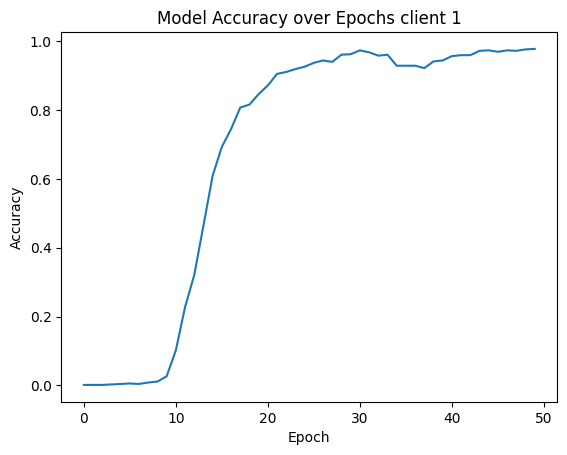

In [18]:
import matplotlib.pyplot as plt

# Plotting the accuracy over epochs
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy over Epochs client 1')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [14]:
'''import socket
import pickle
import tensorflow as tf
from sharedconfig import vocab_size, embedding_dim
import numpy as np

# Define the server's IP address and port
server_ip = '192.168.94.137'  # Replace with your server's local IP address
server_port = 12347

# Create a client socket
client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

# Connect to the server
client_socket.connect((server_ip, server_port))'''

"import socket\nimport pickle\nimport tensorflow as tf\nfrom sharedconfig import vocab_size, embedding_dim\nimport numpy as np\n\n# Define the server's IP address and port\nserver_ip = '192.168.94.137'  # Replace with your server's local IP address\nserver_port = 12347\n\n# Create a client socket\nclient_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)\n\n# Connect to the server\nclient_socket.connect((server_ip, server_port))"

In [15]:
'''# Get the client's model weights
client_model_weights = model.get_weights()

#save the weights
model.save_weights('l_model1_weights.h5')

# Serialize and send the model weights to the server
client_weights_bytes = pickle.dumps(client_model_weights)
client_socket.send(client_weights_bytes)
'''

"# Get the client's model weights\nclient_model_weights = model.get_weights()\n\n#save the weights\nmodel.save_weights('l_model1_weights.h5')\n\n# Serialize and send the model weights to the server\nclient_weights_bytes = pickle.dumps(client_model_weights)\nclient_socket.send(client_weights_bytes)\n"

In [16]:
#print(client_model_weights)

In [17]:

# Close the client socket
#client_socket.close()